In [1]:
using LinearAlgebra
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)

distname(dist) = replace(string(dist), r"{[^}]*}"=>"", r".="=>"")
distname(dist::InverseGamma) = "InverseGamma$(params(dist))"
function distname(dist::MixtureModel)
    n = ncomponents(dist)
    c = components(dist)
    p = probs(dist)
    "$(p[1]) " * distname(c[1]) * prod(" + $(p[k]) " * distname(c[k]) for k in 2:n)
end

function plot_clt3(dist, a=1:10; L=10^5, kwargs...)
    @show a
    n = length(a)
    X̄ = zeros(L)
    for i in 1:L
        X = rand(dist, n)
        X̄[i] = dot(a, X)
    end
    histogram(X̄; norm=true, alpha=0.3, label="dot(a, X)", kwargs...)
    plot!(Normal(sum(a)*mean(dist), norm(a)*std(dist)); label="normal approx.")
    title!(distname(dist) * ", n = $n")
end

plot_clt3 (generic function with 2 methods)

a = 1:10


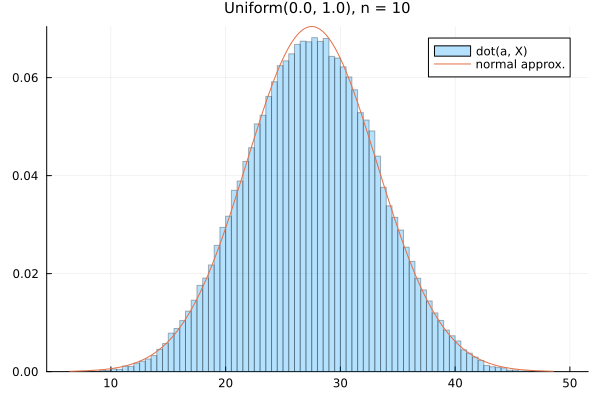

In [2]:
plot_clt3(Uniform(), 1:10)

a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


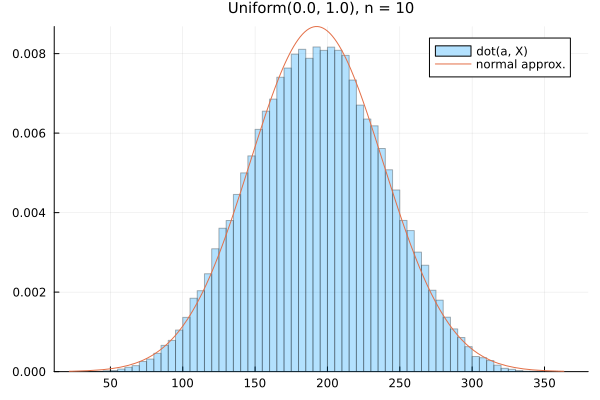

In [3]:
plot_clt3(Uniform(), (1:10).^2)

a = 1:10


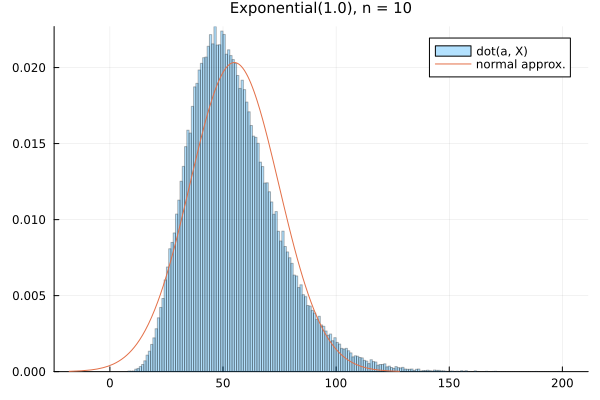

In [4]:
plot_clt3(Exponential(), 1:10)

a = 1:100


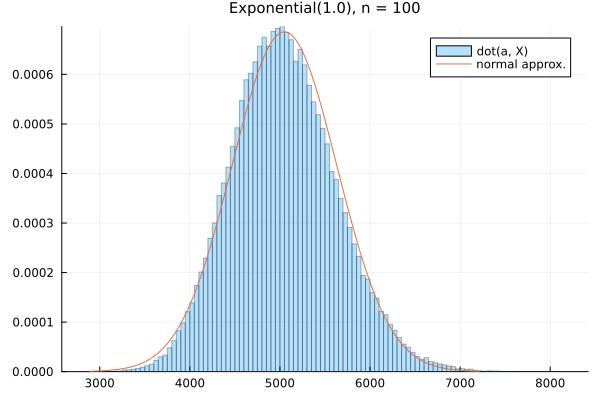

In [5]:
plot_clt3(Exponential(), 1:100)

a = [0.59, 0.42, 0.67, 0.99, 0.1, 0.39, 0.91, 0.74, 0.29, 0.5, 0.19, 0.74, 0.39, 0.48, 0.82, 0.19, 0.04, 0.65, 0.58, 0.56, 0.45, 0.44, 0.84, 0.07, 0.58, 0.86, 0.21, 0.13, 0.96, 0.04, 0.52, 0.43, 0.97, 0.09, 0.36, 0.63, 0.14, 0.39, 0.85, 0.2, 0.53, 0.08, 0.06, 0.15, 0.92, 0.43, 0.35, 0.57, 0.25, 0.82, 0.29, 0.11, 0.94, 0.71, 0.99, 0.67, 0.82, 0.25, 0.05, 0.46, 0.41, 0.73, 0.02, 0.25, 0.23, 0.56, 0.92, 0.55, 0.46, 0.14, 0.32, 1.0, 0.0, 0.79, 0.74, 0.68, 0.89, 0.01, 0.5, 0.03, 0.53, 0.74, 0.87, 0.93, 0.39, 0.96, 0.51, 0.07, 0.67, 0.31, 0.53, 0.58, 0.83, 0.17, 0.58, 0.07, 0.8, 0.22, 0.98, 0.33]


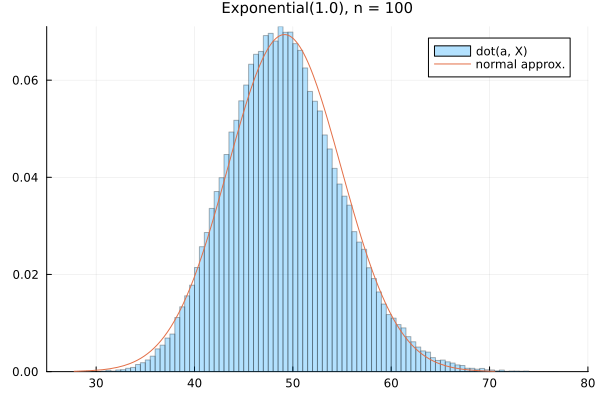

In [6]:
plot_clt3(Exponential(), round.(rand(100); digits=2))

a = [0.25, 0.51, -0.72, 1.49, -0.54, 1.18, -0.02, -0.43, -1.36, 0.4, 0.15, -1.09, 0.78, -1.21, 1.24, -0.62, 1.49, -0.08, 1.04, 0.98, 0.17, 1.0, 1.14, -0.75, -0.44, 0.2, 1.07, -0.6, -0.92, 0.57, -0.25, 1.3, 1.05, -0.6, -0.2, 0.57, 2.44, 1.22, 0.06, 1.24, -0.71, -0.24, -0.65, -1.49, 0.42, -0.56, -1.31, -0.33, -0.89, 0.66, -1.48, 0.19, 0.19, -0.9, -0.36, 1.37, 0.82, -0.32, 1.61, 0.59, -1.29, -0.43, 0.45, 0.64, -0.15, 1.67, 1.01, -0.08, 1.42, 0.15, 0.1, -0.36, -1.88, -1.5, -1.37, -0.04, -0.5, -0.97, -0.5, -0.19, 1.6, 0.57, -0.5, -0.97, -0.12, 0.51, -0.34, -0.67, -1.72, -0.25, 0.29, 0.64, -0.68, 0.19, 0.85, 2.37, 0.65, -1.65, -1.56, -0.6]


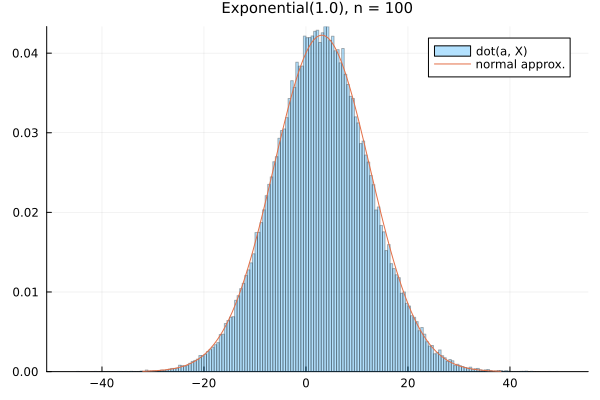

In [7]:
plot_clt3(Exponential(), round.(randn(100); digits=2))

a = 1:20


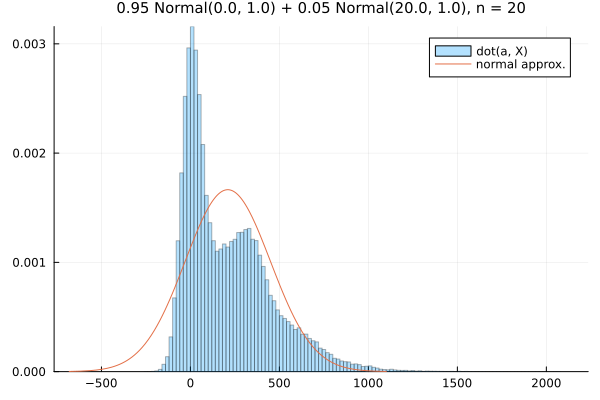

In [8]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), 1:20)

a = 1:100


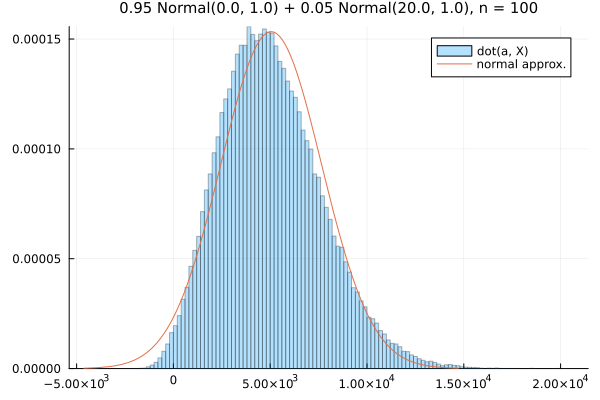

In [9]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), 1:100)

a = 1:200


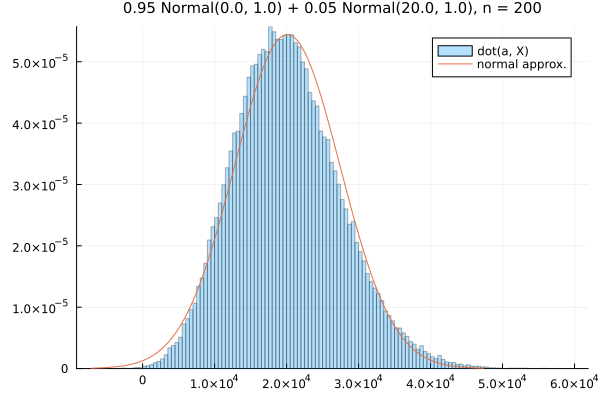

In [10]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), 1:200)

a = 1:1000


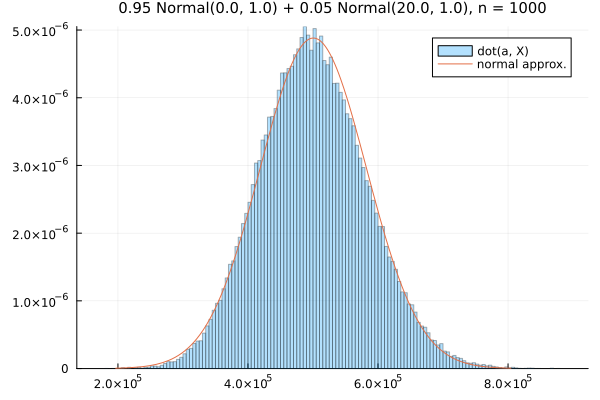

In [11]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), 1:1000)

a = [0.81, 0.75, 0.84, 0.41, 0.54, 0.57, 0.26, 0.45, 0.33, 0.83, 0.43, 0.52, 0.9, 0.0, 0.5, 0.99, 0.19, 0.82, 0.14, 0.21, 0.14, 0.97, 0.61, 0.73, 0.75, 0.48, 0.59, 0.9, 0.85, 0.46, 0.11, 0.81, 0.11, 0.08, 0.27, 0.12, 0.45, 0.71, 0.97, 0.11, 0.85, 0.97, 0.75, 0.63, 0.95, 0.48, 0.08, 0.62, 0.15, 0.28, 0.49, 0.02, 0.42, 0.44, 0.19, 0.3, 0.82, 0.98, 0.8, 0.01, 0.24, 0.94, 0.96, 0.26, 0.8, 1.0, 0.53, 0.68, 0.82, 0.62, 0.96, 0.29, 0.34, 0.78, 0.05, 0.64, 0.03, 0.2, 0.38, 0.86, 0.2, 0.3, 0.81, 0.4, 0.74, 0.49, 0.41, 0.26, 0.45, 0.53, 0.96, 0.97, 0.33, 0.7, 0.66, 0.14, 0.7, 0.8, 0.69, 0.45]


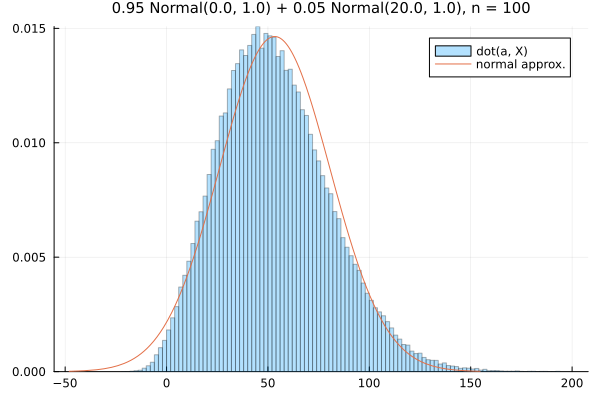

In [12]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), round.(rand(100); digits=2))

a = [0.12, 1.09, 0.82, -0.25, -0.38, 1.89, 1.27, -0.19, -0.43, 1.91, -0.04, -0.1, 1.02, -0.73, -0.42, 2.29, -0.9, 0.36, 1.42, 0.22, 1.22, 0.45, -0.98, -0.1, 0.57, -0.24, -0.46, -0.92, -0.64, 2.05, 1.21, -0.3, 0.05, -0.09, -0.15, -0.1, 0.33, -0.92, 0.65, 0.5, 0.61, 0.55, 0.47, -0.81, 0.32, -0.37, 1.09, -0.54, 0.67, 0.89, -0.6, -0.94, -0.08, -1.83, 0.5, -0.58, 0.74, -0.06, -1.77, -0.77, -0.09, -0.74, -0.17, -2.13, 0.36, 0.42, 0.15, -0.33, 0.16, 0.5, 1.11, 0.35, -1.53, 0.46, 0.71, -0.99, -1.27, 0.18, -1.98, 0.56, -0.05, 0.11, -0.97, 0.01, -0.33, -1.46, 1.16, -2.07, 0.4, -0.6, 1.58, 0.54, -0.51, 0.13, 0.04, -0.76, -1.67, 0.98, -0.06, 1.65]


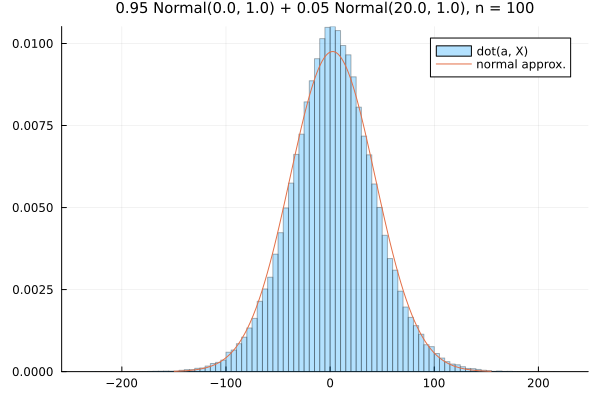

In [13]:
plot_clt3(MixtureModel([Normal(), Normal(20)], [0.95, 0.05]), round.(randn(100); digits=2))